In [18]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
from datetime import timedelta

In [19]:
transportData = "Refrigerated_Truck_Rates_and_Availability_Full.csv"
AvoTransportData = "Refrigerated_Truck_Rates_and_Availability_Avo.csv"
avo_data = "avo_prices.csv"
gas_data = "gas_prices.csv"
loadweather = "SanDiegoWeatherData.csv"
bananaprices = "banana_prices.csv"

In [20]:
banana_prices_df = pd.read_csv(bananaprices)
banana_prices_df.head()

,Date,Banana Price per Pound,old,Percent Change
0,1/1/2016,0.581,-0.003,-0.3
1,2/1/2016,0.573,-0.030,-3.0
2,3/1/2016,0.586,-0.012,-1.2
3,4/1/2016,0.574,-0.039,-3.9
4,5/1/2016,0.570,-0.021,-2.1


In [21]:
SDweather_df = pd.read_csv(loadweather)
SDweather_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1420070400,2015-01-01 00:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,51.37,43.63,49.09,52.83,...,280,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
1,1420074000,2015-01-01 01:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,50.05,41.99,47.80,53.22,...,340,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
2,1420077600,2015-01-01 02:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,46.72,40.64,39.92,53.62,...,342,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
3,1420081200,2015-01-01 03:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,45.19,39.15,39.92,54.01,...,14,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
4,1420084800,2015-01-01 04:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,43.88,37.85,37.94,54.27,...,28,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34516,1543690800,2018-12-01 19:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,63.37,60.57,59.83,64.94,...,180,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d
34517,1543694400,2018-12-01 20:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,63.79,58.84,60.77,64.40,...,250,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d
34518,1543698000,2018-12-01 21:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,64.74,59.83,59.79,66.92,...,0,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d
34519,1543701600,2018-12-01 22:00:00 +0000 UTC,-28800,San Diego,32.715738,-117.161084,64.87,59.59,60.04,66.20,...,290,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d


In [22]:
initial_transport_df = pd.read_csv(transportData)
initial_transport_df.head()

,Date,Week,Month,Quarter,Year,Region,Origin,Destination,Distance,Commodity,Week Low,Week High,Midpoint,Rate Per Mile,Availability
0,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",ATLANTA,2100.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",5000,5400,5200,2.48,5
1,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",BALTIMORE,2600.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",6400,6800,6600,2.54,5
2,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",BOSTON,2900.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",7300,7800,7550,2.60,5
3,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",CHICAGO,2030.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",4700,5200,4950,2.44,5
4,01/07/2020,1,1,1,2020,Arizona,"Imperial, Palo Verde And Coachella Valleys, Ca...",DALLAS,1300.0,"LETTUCE, BROCCOLI, CAULIFLOWER, ROMAINE AND LE...",3600,4100,3850,2.96,5


In [27]:
initial_avo_transport_df = pd.read_csv(AvoTransportData)
# initial_avo_transport_df.head()
initial_avo_transport_df

,Date,Week,Month,Quarter,Year,Region,Origin,Destination,Distance,Commodity,Week Low,Week High,Midpoint,Rate Per Mile,Availability
0,05/12/2015,19,5,2,2015,California,South District California,ATLANTA,2100,CITRUS AND AVOCADOS,5200,6000,5550,2.64,3
1,05/12/2015,19,5,2,2015,California,South District California,BALTIMORE,2600,CITRUS AND AVOCADOS,6500,7300,6650,2.56,3
2,05/12/2015,19,5,2,2015,California,South District California,BOSTON,2900,CITRUS AND AVOCADOS,7200,7800,7350,2.53,3
3,05/12/2015,19,5,2,2015,California,South District California,CHICAGO,2030,CITRUS AND AVOCADOS,4500,5200,4850,2.39,3
4,05/12/2015,19,5,2,2015,California,South District California,DALLAS,1300,CITRUS AND AVOCADOS,4000,4200,4100,3.15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,03/20/2018,11,3,1,2018,California,South District California,CHICAGO,2030,"CITRUS, AVOCADOS",4400,5350,4600,2.27,3
770,03/20/2018,11,3,1,2018,California,South District California,DALLAS,1300,"CITRUS, AVOCADOS",3600,4300,4000,3.08,3
771,03/20/2018,11,3,1,2018,California,South District California,MIAMI,2600,"CITRUS, AVOCADOS",6800,7300,7000,2.69,3
772,03/20/2018,11,3,1,2018,California,South District California,PHILADELPHIA,2650,"CITRUS, AVOCADOS",6000,7100,6500,2.45,3


In [42]:
avo_data_df = pd.read_csv(avo_data)


merge_avo_df = avo_data_df.loc[avo_data_df['region'] == 'TotalUS']
merge_avo_df = merge_avo_df.loc[merge_avo_df['type'] == 'conventional']
merge_avo_df = merge_avo_df[['New Date', 'AveragePrice']]

In [25]:
gas_data_df = pd.read_csv(gas_data)
gas_data_df.head()

,Date,Gasoline - All Grades,All Grades - Conventional Areas,All Grades - Reformulated Areas,Regular,Conventional Areas - Regular,Reformulated Areas - Regular,Midgrade,Conventional Areas - Midgrade,Reformulated Areas - Midgrade,Premium,Conventional Areas - Premium,Reformulated Areas - Premium,Diesel (On-Highway) - All Types,Ultra Low Sulfur (15 ppm and Under),Low Sulfer (Above 15 ppm to 500 ppm)
0,8/20/1990,NaN,NaN,NaN,1.191,1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/27/1990,NaN,NaN,NaN,1.245,1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/3/1990,NaN,NaN,NaN,1.242,1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/10/1990,NaN,NaN,NaN,1.252,1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/17/1990,NaN,NaN,NaN,1.266,1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
avo_data_df = pd.read_csv(avo_data)
avo_data_df.head()

,Remaining Weeks in Year,Date,New Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1/4/2015,1/5/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,51,1/4/2015,1/5/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,51,1/4/2015,1/5/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,51,1/4/2015,1/5/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,51,1/4/2015,1/5/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [43]:
merge_avo_df.head()

,New Date,AveragePrice
51,1/5/2015,0.95
159,1/12/2015,1.01
267,1/19/2015,1.03
375,1/26/2015,1.04
483,2/2/2015,0.89


In [44]:
merge_avo_df = merge_avo_df.rename(columns={"New Date": "Date",
                                                        "AveragePrice": "Avo Average Price",
                                                   })

In [48]:
merge_avo_df = merge_avo_df.reset_index()

In [75]:
merge_avo_df = merge_avo_df[['Date', 'Avo Average Price']]
merge_avo_df.head(20)

,Date,Avo Average Price
0,2015-01-05,0.95
1,2015-01-12,1.01
2,2015-01-19,1.03
3,2015-01-26,1.04
4,2015-02-02,0.89
5,2015-02-09,0.95
6,2015-02-16,1.03
7,2015-02-23,1.02
8,2015-03-02,0.97
9,2015-03-09,1.02


In [59]:
gas_data_df['Date'].dtype

dtype('<M8[ns]')

In [58]:
gas_data_df['Date'] = pd.to_datetime(gas_data_df['Date'])
merge_avo_df['Date'] = pd.to_datetime(merge_avo_df['Date'])

In [63]:
gas_data_df = gas_data_df[['Date', 'Gasoline - All Grades']]
gas_data_df

,Date,Gasoline - All Grades
0,1990-08-20,NaN
1,1990-08-27,NaN
2,1990-09-03,NaN
3,1990-09-10,NaN
4,1990-09-17,NaN
...,...,...
1556,2020-06-15,2.185
1557,2020-06-22,2.216
1558,2020-06-29,2.260
1559,2020-07-06,2.265


In [ ]:
avo_transport_df['date'] = pd.to_datetime(avo_transport_df['date'])
# avo_transport_df

avo_transport_df['date'] = avo_transport_df['date'] - timedelta(days=2)
# avo_transport_df

In [66]:
initial_avo_transport_df['Date'] = pd.to_datetime(initial_avo_transport_df['Date'])
initial_avo_transport_df.head()

,Date,Week,Month,Quarter,Year,Region,Origin,Destination,Distance,Commodity,Week Low,Week High,Midpoint,Rate Per Mile,Availability
0,2015-05-12,19,5,2,2015,California,South District California,ATLANTA,2100,CITRUS AND AVOCADOS,5200,6000,5550,2.64,3
1,2015-05-12,19,5,2,2015,California,South District California,BALTIMORE,2600,CITRUS AND AVOCADOS,6500,7300,6650,2.56,3
2,2015-05-12,19,5,2,2015,California,South District California,BOSTON,2900,CITRUS AND AVOCADOS,7200,7800,7350,2.53,3
3,2015-05-12,19,5,2,2015,California,South District California,CHICAGO,2030,CITRUS AND AVOCADOS,4500,5200,4850,2.39,3
4,2015-05-12,19,5,2,2015,California,South District California,DALLAS,1300,CITRUS AND AVOCADOS,4000,4200,4100,3.15,3


In [67]:
initial_avo_transport_df = initial_avo_transport_df[['Date', 'Rate Per Mile']]
initial_avo_transport_df.head()

,Date,Rate Per Mile
0,2015-05-12,2.64
1,2015-05-12,2.56
2,2015-05-12,2.53
3,2015-05-12,2.39
4,2015-05-12,3.15


In [69]:
initial_avo_transport_df = initial_avo_transport_df.groupby(by="Date").mean()

initial_avo_transport_df.head()

,Rate Per Mile
Date,
2015-05-12,2.663333
2015-05-19,2.672222
2015-05-26,2.661111
2015-06-02,2.731111
2015-06-09,2.741111


In [71]:
initial_avo_transport_df = initial_avo_transport_df.reset_index()
initial_avo_transport_df.head()

,Date,Rate Per Mile
0,2015-05-12,2.663333
1,2015-05-19,2.672222
2,2015-05-26,2.661111
3,2015-06-02,2.731111
4,2015-06-09,2.741111


In [74]:
initial_avo_transport_df['Date'] = initial_avo_transport_df['Date'] - timedelta(days=1)
initial_avo_transport_df.head()

,Date,Rate Per Mile
0,2015-05-11,2.663333
1,2015-05-18,2.672222
2,2015-05-25,2.661111
3,2015-06-01,2.731111
4,2015-06-08,2.741111


In [94]:
final_df = pd.merge(initial_avo_transport_df, gas_data_df, how='outer', on=['Date'])
final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades
0,2015-05-11,2.663333,2.776
1,2015-05-18,2.672222,2.827
2,2015-05-25,2.661111,2.857
3,2015-06-01,2.731111,2.863
4,2015-06-08,2.741111,2.863


In [95]:
final_df = pd.merge(final_df, merge_avo_df, how='outer', on=['Date'])
final_df.head(60)

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price
0,2015-05-11,2.663333,2.776,1.02
1,2015-05-18,2.672222,2.827,1.06
2,2015-05-25,2.661111,2.857,1.04
3,2015-06-01,2.731111,2.863,1.03
4,2015-06-08,2.741111,2.863,1.00
5,2015-06-15,2.782222,2.918,0.98
6,2015-06-22,2.890000,2.895,1.02
7,2015-06-29,2.843333,2.885,1.06
8,2015-07-06,2.847778,2.877,1.04
9,2015-07-13,2.807778,2.920,1.07


In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
from sklearn.datasets import make_regression
final_df = final_df[final_df['Date'].dt.year >= 2015]
# plt.scatter(final_df['Date'], final_df['Gasoline - All Grades'])

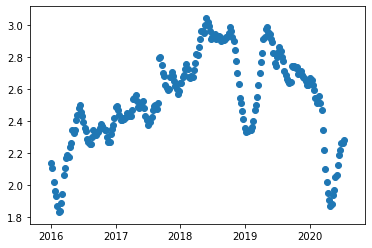

In [91]:
plt.scatter(final_df['Date'], final_df['Gasoline - All Grades'])

In [98]:
final_df.to_csv('comparison.csv', index=False)

In [97]:
final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price
0,2015-05-11,2.663333,2.776,1.02
1,2015-05-18,2.672222,2.827,1.06
2,2015-05-25,2.661111,2.857,1.04
3,2015-06-01,2.731111,2.863,1.03
4,2015-06-08,2.741111,2.863,1.00
